In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Read the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()
#df_test.head()

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962


SEPERATE DOOR VARIABLE 

In [78]:
#TRAIN 
df_train['num_door'] = pd.to_numeric(df_train['door'].str.split(' ').str[2].str[0], errors = 'coerce')
df_train.describe()

df_train = df_train.drop(['door'], axis = 1)
display(df_train)

#TEST
df_test['num_floor'] = pd.to_numeric(df_test['door'].str.split('º').str[0], errors = 'coerce')
df_test['num_door'] = pd.to_numeric(df_test['door'].str.split(' ').str[2].str[0], errors = 'coerce')
df_test = df_test.drop(['door'], axis = 1)
display(df_test)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,NaN,1096,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,2.0,1396,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,NaN,1263,1.0
3,6088,1.0,2.0,-41.0,NaN,2002.0,False,True,Sants,5.0,False,False,NaN,1290,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,3.0,962,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,NaN,1066,1.0
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,NaN,1255,4.0
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1.0,1220,3.0
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,NaN,1547,4.0


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,num_floor,num_door
0,6253,NaN,1.0,152.0,NaN,2012.0,True,True,Les Cors,0.0,False,False,NaN,5.0,4.0
1,4685,NaN,2.0,90.0,east,1957.0,True,False,Ciutat Vella,2.0,False,True,3.0,10.0,1.0
2,1732,NaN,2.0,86.0,NaN,1991.0,False,False,Eixample,0.0,False,True,NaN,5.0,2.0
3,4743,NaN,3.0,164.0,NaN,2002.0,False,True,Nou Barris,7.0,False,False,NaN,8.0,4.0
4,4522,NaN,1.0,99.0,NaN,1984.0,True,True,Sant Andreu,0.0,True,False,3.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,True,True,Sarrià-Sant Gervasi,0.0,True,True,NaN,5.0,2.0
1996,8286,1.0,2.0,161.0,NaN,1984.0,True,False,Nou Barris,9.0,False,False,NaN,5.0,1.0
1997,7854,4.0,3.0,111.0,NaN,1957.0,True,True,Gràcia,0.0,False,True,NaN,4.0,2.0
1998,1096,2.0,1.0,154.0,north,2018.0,False,False,Nou Barris,7.0,False,False,NaN,9.0,1.0


In [79]:
# We study the different labels that non-numeric variables have

for column in df_train.select_dtypes(exclude = ['int', 'float']).columns:
    print(f"> {column}: {df_train[column].unique()}\n")

'''
We can observe that there are some inconsistencies that we will need to handle:
1. In 'orientation' we have 'south' and 'soxth'. We need to change 'soxth' to 'south'.
2. In 'neighborhood' we have no inconsistencies but there is a consistent typo. We will change 'Les Cors' to 'Les Corts'.
3. The rest of the variables have no inconsistencies aside from having missing values, which we will handle infra.
'''

df_train['neighborhood'] = df_train['neighborhood'].replace('Les Cors', 'Les Corts')
df_train['orientation'] = df_train['orientation'].replace('soxth', 'south')

if not df_train['orientation'].isin(['soxth']).any() and not df_train['neighborhood'].isin(['Les Cors']).any():
    print('>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<')

df_test['neighborhood'] = df_test['neighborhood'].replace('Les Cors', 'Les Corts')
df_test['orientation'] = df_test['orientation'].replace('soxth', 'south')

if not df_test['orientation'].isin(['soxth']).any() and not df_test['neighborhood'].isin(['Les Cors']).any():
    print('>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<')

> orientation: [nan 'west' 'east' 'north' 'south' 'soxth']

> is_furnished: [False True nan]

> has_pool: [False True nan]

> neighborhood: ['Sant Martí' 'Sants' 'Eixample' 'Gràcia' nan 'Les Cors'
 'Sarrià-Sant Gervasi' 'Horta' 'Sant Andreu' 'Ciutat Vella' 'Nou Barris']

> has_ac: [True False nan]

> accepts_pets: [True False nan]

>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<
>>>>> RESULT: "soxth" and "Les Cors" are not values in the dataset anymore <<<<<


In [80]:
df_train = df_train.drop(columns = ['num_supermarkets'], axis = 1)
display(df_train)

df_test = df_test.drop(columns = ['num_supermarkets'], axis = 1)
display(df_test)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,1096,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,1396,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,1263,1.0
3,6088,1.0,2.0,-41.0,NaN,2002.0,False,True,Sants,5.0,False,False,1290,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,962,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,1066,1.0
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,1255,4.0
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1220,3.0
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,1547,4.0


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_floor,num_door
0,6253,NaN,1.0,152.0,NaN,2012.0,True,True,Les Corts,0.0,False,False,5.0,4.0
1,4685,NaN,2.0,90.0,east,1957.0,True,False,Ciutat Vella,2.0,False,True,10.0,1.0
2,1732,NaN,2.0,86.0,NaN,1991.0,False,False,Eixample,0.0,False,True,5.0,2.0
3,4743,NaN,3.0,164.0,NaN,2002.0,False,True,Nou Barris,7.0,False,False,8.0,4.0
4,4522,NaN,1.0,99.0,NaN,1984.0,True,True,Sant Andreu,0.0,True,False,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,True,True,Sarrià-Sant Gervasi,0.0,True,True,5.0,2.0
1996,8286,1.0,2.0,161.0,NaN,1984.0,True,False,Nou Barris,9.0,False,False,5.0,1.0
1997,7854,4.0,3.0,111.0,NaN,1957.0,True,True,Gràcia,0.0,False,True,4.0,2.0
1998,1096,2.0,1.0,154.0,north,2018.0,False,False,Nou Barris,7.0,False,False,9.0,1.0


In [81]:
# 1.
df_train = df_train.dropna(subset = ['neighborhood'])

# 2.
df_whole = pd.concat([df_train, df_test], axis = 0, ignore_index = True)

# 3.
df_whole['square_meters'] = df_whole['square_meters'].abs()
df_whole.loc[df_whole['num_rooms'] > 12, 'num_rooms'] = np.nan

# 4.
bool_variables = ['is_furnished',
                    'has_pool',
                    'has_ac',
                    'accepts_pets']

for catvar in bool_variables:
    df_whole[catvar] = df_whole[catvar].map({True: 1, False: 0})

display(df_whole)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_door,num_floor
0,9255,1.0,1.0,NaN,NaN,1956.0,0.0,0.0,Sant Martí,2.0,1.0,1.0,1096.0,1.0,NaN
1,1562,4.0,1.0,133.0,west,1960.0,0.0,0.0,Sants,4.0,0.0,0.0,1396.0,2.0,NaN
2,1671,2.0,3.0,137.0,NaN,2000.0,0.0,1.0,Eixample,0.0,0.0,0.0,1263.0,1.0,NaN
3,6088,1.0,2.0,41.0,NaN,2002.0,0.0,1.0,Sants,5.0,0.0,0.0,1290.0,1.0,NaN
4,6670,2.0,1.0,70.0,NaN,1979.0,1.0,0.0,Gràcia,0.0,0.0,1.0,962.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,3.0,3.0,95.0,south,1976.0,1.0,1.0,Sarrià-Sant Gervasi,0.0,1.0,1.0,NaN,2.0,5.0
9831,8286,1.0,2.0,161.0,NaN,1984.0,1.0,0.0,Nou Barris,9.0,0.0,0.0,NaN,1.0,5.0
9832,7854,4.0,3.0,111.0,NaN,1957.0,1.0,1.0,Gràcia,0.0,0.0,1.0,NaN,2.0,4.0
9833,1096,2.0,1.0,154.0,north,2018.0,0.0,0.0,Nou Barris,7.0,0.0,0.0,NaN,1.0,9.0


In [82]:
# 5.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vars_to_scale = [
    'square_meters',
    'num_rooms',
    'num_baths',
    'year_built',
    'num_crimes',
    'num_floor',
    'num_door',
]
df_whole[vars_to_scale] = scaler.fit_transform(df_whole[vars_to_scale])
display(df_whole)

,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_door,num_floor
0,9255,-1.330886,-1.216409,NaN,NaN,-1.422690,0.0,0.0,Sant Martí,-0.223638,1.0,1.0,1096.0,-1.330730,NaN
1,1562,1.345185,-1.216409,0.673252,west,-1.228787,0.0,0.0,Sants,0.359485,0.0,0.0,1396.0,-0.440127,NaN
2,1671,-0.438862,1.235740,0.786283,NaN,0.710249,0.0,1.0,Eixample,-0.806761,0.0,0.0,1263.0,-1.330730,NaN
3,6088,-1.330886,0.009665,-1.926453,NaN,0.807200,0.0,1.0,Sants,0.651046,0.0,0.0,1290.0,-1.330730,NaN
4,6670,-0.438862,-1.216409,-1.106981,NaN,-0.307745,1.0,0.0,Gràcia,-0.806761,0.0,1.0,962.0,-1.330730,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.400539,south,-0.453173,1.0,1.0,Sarrià-Sant Gervasi,-0.806761,1.0,1.0,NaN,-0.440127,-0.204984
9831,8286,-1.330886,0.009665,1.464467,NaN,-0.065365,1.0,0.0,Nou Barris,1.817292,0.0,0.0,NaN,-1.330730,-0.204984
9832,7854,1.345185,1.235740,0.051583,NaN,-1.374214,1.0,1.0,Gràcia,-0.806761,0.0,1.0,NaN,-0.440127,-0.549095
9833,1096,-0.438862,-1.216409,1.266663,north,1.582814,0.0,0.0,Nou Barris,1.234169,0.0,0.0,NaN,-1.330730,1.171461


In [83]:
# 6.
nas_train = df_train.isna().sum()
nas_test = df_test.isna().sum()
from sklearn.impute import KNNImputer

df_whole_impute = df_whole.copy()
df_whole_impute = df_whole_impute.drop(columns = ['id', 'orientation', 'neighborhood', 'price'], axis = 1)
#display(df_whole_impute)

knn_imputer = KNNImputer(n_neighbors = 25, missing_values = np.nan)
imputed_data = knn_imputer.fit_transform(df_whole_impute)
imputed_df = pd.DataFrame(imputed_data, columns = df_whole_impute.columns)
df_whole_impute = imputed_df
df_whole_impute[bool_variables] = df_whole_impute[bool_variables].round(0).astype('int64')

#display(df_whole)
#display(df_whole_impute)
print(df_whole['is_furnished'].isna().sum())
print(df_whole['is_furnished'].sum())
print(df_whole_impute['is_furnished'].sum())

for catvar in bool_variables:
    print((df_whole_impute[catvar] == df_whole[catvar]).sum() == 9835 - (nas_train + nas_test)[catvar])

197
4681.0
4767
True
True
True
True


In [84]:
# 7.
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

common_cols = df_whole.columns.intersection(df_whole_impute.columns)
df_whole[common_cols] = df_whole_impute[common_cols]


'''
for var in df_whole.columns:
    
    print(f"> {var}: {df_whole[var].isna().sum()} missing values")
'''

df_neigh_impute = df_whole.copy()
df_neigh_impute = df_neigh_impute.drop(columns = ['id', 'orientation', 'price'], axis = 1)

#display(df_whole[df_whole['id'] == 8572])

list_of_neigh = df_neigh_impute['neighborhood'].unique()
list_of_neigh = list_of_neigh.tolist()
list_of_neigh.remove(np.nan)
#display(list_of_neigh, len(list_of_neigh))

mapping = {}

for i in range(len(list_of_neigh)):
    mapping[list_of_neigh[i]] = range(len(list_of_neigh))[i] + 1

rev_mapping = {value: key for key, value in mapping.items()}
#display(mapping, rev_mapping)

df_neigh_impute['neighborhood'] = df_neigh_impute['neighborhood'].map(mapping)

#labeler = LabelEncoder()
#labeler.fit(df_neigh_impute['neighborhood'])
#df_neigh_impute['neighborhood'] = labeler.transform(df_neigh_impute['neighborhood'])
#display(df_neigh_impute)
#display(df_neigh_impute.loc[7757])

knn_imputer = KNNImputer(n_neighbors = 25)
imputed_data = knn_imputer.fit_transform(df_neigh_impute)
imputed_df = pd.DataFrame(imputed_data, columns = df_neigh_impute.columns)
df_neigh_impute['neighborhood'] = imputed_df['neighborhood'].round(0)

#display(df_neigh_impute.loc[7757])
#df_neigh_impute['neighborhood'] = labeler.inverse_transform(df_neigh_impute['neighborhood'].astype(int))

df_neigh_impute['neighborhood'] = df_neigh_impute['neighborhood'].map(rev_mapping)

print((df_whole['neighborhood'] == df_neigh_impute['neighborhood']).sum())

df_whole['neighborhood'] = df_neigh_impute['neighborhood']


for var in df_whole.columns:
    
    print(f"> {var}: {df_whole[var].isna().sum()} missing values")


#display(df_whole[df_whole['neighborhood'].isna()])

display(df_whole)
display(df_neigh_impute)

for col in df_neigh_impute.columns:
    print((df_whole[col] == df_neigh_impute[col]).sum())

9800
> id: 0 missing values
> num_rooms: 0 missing values
> num_baths: 0 missing values
> square_meters: 0 missing values
> orientation: 2822 missing values
> year_built: 0 missing values
> is_furnished: 0 missing values
> has_pool: 0 missing values
> neighborhood: 0 missing values
> num_crimes: 0 missing values
> has_ac: 0 missing values
> accepts_pets: 0 missing values
> price: 2000 missing values
> num_door: 0 missing values
> num_floor: 0 missing values


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_door,num_floor
0,9255,-1.330886,-1.216409,0.083232,NaN,-1.422690,0,0,Sant Martí,-0.223638,1,1,1096.0,-1.330730,-0.232513
1,1562,1.345185,-1.216409,0.673252,west,-1.228787,0,0,Sants,0.359485,0,0,1396.0,-0.440127,0.345594
2,1671,-0.438862,1.235740,0.786283,NaN,0.710249,0,1,Eixample,-0.806761,0,0,1263.0,-1.330730,0.400652
3,6088,-1.330886,0.009665,-1.926453,NaN,0.807200,0,1,Sants,0.651046,0,0,1290.0,-1.330730,-0.136161
4,6670,-0.438862,-1.216409,-1.106981,NaN,-0.307745,1,0,Gràcia,-0.806761,0,1,962.0,-1.330730,0.029012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.400539,south,-0.453173,1,1,Sarrià-Sant Gervasi,-0.806761,1,1,NaN,-0.440127,-0.204984
9831,8286,-1.330886,0.009665,1.464467,NaN,-0.065365,1,0,Nou Barris,1.817292,0,0,NaN,-1.330730,-0.204984
9832,7854,1.345185,1.235740,0.051583,NaN,-1.374214,1,1,Gràcia,-0.806761,0,1,NaN,-0.440127,-0.549095
9833,1096,-0.438862,-1.216409,1.266663,north,1.582814,0,0,Nou Barris,1.234169,0,0,NaN,-1.330730,1.171461


,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_door,num_floor
0,-1.330886,-1.216409,0.083232,-1.422690,0,0,Sant Martí,-0.223638,1,1,-1.330730,-0.232513
1,1.345185,-1.216409,0.673252,-1.228787,0,0,Sants,0.359485,0,0,-0.440127,0.345594
2,-0.438862,1.235740,0.786283,0.710249,0,1,Eixample,-0.806761,0,0,-1.330730,0.400652
3,-1.330886,0.009665,-1.926453,0.807200,0,1,Sants,0.651046,0,0,-1.330730,-0.136161
4,-0.438862,-1.216409,-1.106981,-0.307745,1,0,Gràcia,-0.806761,0,1,-1.330730,0.029012
...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0.453161,1.235740,-0.400539,-0.453173,1,1,Sarrià-Sant Gervasi,-0.806761,1,1,-0.440127,-0.204984
9831,-1.330886,0.009665,1.464467,-0.065365,1,0,Nou Barris,1.817292,0,0,-1.330730,-0.204984
9832,1.345185,1.235740,0.051583,-1.374214,1,1,Gràcia,-0.806761,0,1,-0.440127,-0.549095
9833,-0.438862,-1.216409,1.266663,1.582814,0,0,Nou Barris,1.234169,0,0,-1.330730,1.171461


9835
9835
9835
9835
9835
9835
9835
9835
9835
9835
9835
9835


In [85]:
# 8.
from sklearn.preprocessing import OneHotEncoder 

def OHencoder(data, list_of_columns):
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    encoded_data = encoder.fit_transform(data[[list_of_columns]]).toarray()
    encoded_df = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([list_of_columns]), index = data.index)
    encoded_df = pd.concat([data, encoded_df], axis = 1)
    
    return encoded_df

df_whole = OHencoder(df_whole, 'neighborhood')
df_whole = OHencoder(df_whole, 'orientation')
df_whole = df_whole.drop(columns = ['orientation_nan', 'orientation', 'neighborhood'])

display(df_whole)

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
0,9255,-1.330886,-1.216409,0.083232,-1.422690,0,0,-0.223638,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1562,1.345185,-1.216409,0.673252,-1.228787,0,0,0.359485,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1671,-0.438862,1.235740,0.786283,0.710249,0,1,-0.806761,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6088,-1.330886,0.009665,-1.926453,0.807200,0,1,0.651046,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,6670,-0.438862,-1.216409,-1.106981,-0.307745,1,0,-0.806761,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,6413,0.453161,1.235740,-0.400539,-0.453173,1,1,-0.806761,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9831,8286,-1.330886,0.009665,1.464467,-0.065365,1,0,1.817292,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9832,7854,1.345185,1.235740,0.051583,-1.374214,1,1,-0.806761,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9833,1096,-0.438862,-1.216409,1.266663,1.582814,0,0,1.234169,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
# 9.
X_train = df_whole.loc[df_whole['id'].isin(df_train['id'])]
X_train = X_train.drop(columns = ['price'], axis = 1)

y_train = df_whole.loc[df_whole['id'].isin(df_train['id'])][['id', 'price']]
#y_train = y_train

X_test = df_whole.loc[df_whole['id'].isin(df_test['id'])]
X_test = X_test.drop(columns = ['price'], axis = 1)

#display(X_train, y_train, X_test)
#print('neighborhood' in X_train.columns, 'orientation.nan' in X_test.columns)
print(X_train.columns)

Index(['id', 'num_rooms', 'num_baths', 'square_meters', 'year_built',
       'is_furnished', 'has_pool', 'num_crimes', 'has_ac', 'accepts_pets',
       'num_door', 'num_floor', 'neighborhood_Ciutat Vella',
       'neighborhood_Eixample', 'neighborhood_Gràcia', 'neighborhood_Horta',
       'neighborhood_Les Corts', 'neighborhood_Nou Barris',
       'neighborhood_Sant Andreu', 'neighborhood_Sant Martí',
       'neighborhood_Sants', 'neighborhood_Sarrià-Sant Gervasi',
       'orientation_east', 'orientation_north', 'orientation_south',
       'orientation_west'],
      dtype='object')


In [92]:
# 10.
from sklearn.model_selection import train_test_split

Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_train, y_train, test_size = 0.2552, random_state = 168)

for dataset in [Xt_train, Xt_test, yt_train, yt_test]:
    dataset.drop(columns = 'id', axis = 1, inplace = True)

display(Xt_train, Xt_test, yt_train, yt_test)

,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,num_door,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
6568,-1.330886,0.009665,-0.965693,-0.113841,0,0,-0.806761,1,0,-0.440127,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1509,-1.330886,1.235740,-0.117963,0.710249,0,0,-0.806761,1,1,1.341080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
428,1.345185,1.235740,0.192872,1.001104,0,1,0.942607,1,1,1.341080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
892,-1.330886,0.009665,0.644994,-1.568118,0,1,1.817292,1,1,0.450476,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7165,-1.330886,1.235740,1.125375,-0.792504,0,0,-0.806761,1,1,-1.330730,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,-0.438862,-1.216409,-0.344024,0.807200,1,1,1.525730,0,1,0.450476,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,0.453161,1.235740,-0.372282,-0.598600,1,0,2.108853,1,1,1.341080,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3385,-1.330886,-1.216409,-0.287509,0.016074,0,0,1.234169,1,0,-1.330730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5375,0.453161,-1.216409,-1.530846,0.807200,0,1,-0.806761,1,1,1.341080,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,num_door,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
5288,-1.330886,-1.216409,-0.626601,-0.598600,0,0,-0.223638,1,1,0.450476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7055,-0.438862,0.009665,-1.389558,0.952628,0,0,1.817292,0,1,1.341080,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6183,-1.330886,1.235740,0.842798,0.080062,1,1,2.108853,1,0,1.341080,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2194,0.453161,0.009665,-0.174478,1.146532,1,1,2.108853,0,1,-1.330730,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5683,0.453161,0.009665,-0.061447,-0.840980,1,1,-0.806761,0,1,-1.330730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6906,0.453161,1.235740,-0.993950,0.177014,1,0,0.067923,0,0,1.341080,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4047,-0.438862,1.235740,0.786283,0.467869,1,0,0.651046,0,1,-1.330730,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1839,-0.438862,0.009665,0.221129,0.322442,0,0,0.359485,0,1,-0.440127,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
766,-0.438862,-1.216409,0.390675,-1.665070,0,0,-0.806761,1,1,-0.440127,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


,price
6568,1117.0
1509,1107.0
428,1610.0
892,1193.0
7165,1087.0
...,...
3511,636.0
2349,940.0
3385,895.0
5375,852.0


,price
5288,1019.0
7055,828.0
6183,1318.0
2194,867.0
5683,1297.0
...,...
6906,1140.0
4047,838.0
1839,1496.0
766,1242.0


In [93]:
# Replace negative 'square_meters' values with their absolute values in df_train
df_train.loc[df_train['square_meters'] < 0, 'square_meters'] = df_train.loc[df_train['square_meters'] < 0, 'square_meters'].abs()
print(df_train['square_meters'].describe())
display(df_train)

count    7680.000000
mean      109.195833
std        35.378362
min         2.000000
25%        79.000000
50%       110.000000
75%       140.000000
max       170.000000
Name: square_meters, dtype: float64


,id,num_rooms,num_baths,square_meters,orientation,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price,num_door
0,9255,1.0,1.0,NaN,NaN,1956.0,False,False,Sant Martí,2.0,True,True,1096,1.0
1,1562,4.0,1.0,133.0,west,1960.0,False,False,Sants,4.0,False,False,1396,2.0
2,1671,2.0,3.0,137.0,NaN,2000.0,False,True,Eixample,0.0,False,False,1263,1.0
3,6088,1.0,2.0,41.0,NaN,2002.0,False,True,Sants,5.0,False,False,1290,1.0
4,6670,2.0,1.0,70.0,NaN,1979.0,True,False,Gràcia,0.0,False,True,962,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,False,False,Sant Martí,0.0,False,False,1066,1.0
7996,5192,4.0,3.0,166.0,NaN,1995.0,False,False,Nou Barris,9.0,False,False,1255,4.0
7997,5391,4.0,1.0,89.0,east,2015.0,True,False,Sant Martí,0.0,True,False,1220,3.0
7998,861,4.0,2.0,167.0,west,1977.0,False,True,Gràcia,0.0,True,False,1547,4.0


RIDGE MODEL 

WILL DO SOME MSE TESTING AS WELL 

In [94]:
from sklearn.linear_model import Ridge

'''
selected_vars = ['num_rooms',
                'square_meters',
                'num_floor',
                'num_crimes',
                'neighborhood_Les Corts',
                'neighborhood_Sant Andreu',
                'neighborhood_Sant Martí',
                'neighborhood_Sants',
                'neighborhood_Sarrià-Sant Gervasi',
                'neighborhood_Eixample',
                'neighborhood_Gràcia',
                'neighborhood_Horta',
                'neighborhood_Ciutat Vella',
                'neighborhood_Nou Barris',
                'is_furnished',
                'num_baths',
                'year_built',
                'has_ac']
'''

non_selected_vars = [
    'id',
    'num_door'
]

Xf_train = X_train.drop(columns = non_selected_vars, axis = 1)
yf_train = y_train.drop(columns = 'id', axis = 1)
Xf_test = X_test.drop(columns = non_selected_vars, axis = 1)

,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,num_crimes,has_ac,accepts_pets,num_floor,...,neighborhood_Les Corts,neighborhood_Nou Barris,neighborhood_Sant Andreu,neighborhood_Sant Martí,neighborhood_Sants,neighborhood_Sarrià-Sant Gervasi,orientation_east,orientation_north,orientation_south,orientation_west
0,-1.330886,-1.216409,0.083232,-1.422690,0,0,-0.223638,1,1,-0.232513,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.345185,-1.216409,0.673252,-1.228787,0,0,0.359485,0,0,0.345594,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.438862,1.235740,0.786283,0.710249,0,1,-0.806761,0,0,0.400652,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.330886,0.009665,-1.926453,0.807200,0,1,0.651046,0,0,-0.136161,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.438862,-1.216409,-1.106981,-0.307745,1,0,-0.806761,0,1,0.029012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,-0.438862,0.107751,-0.400539,1.728242,0,0,-0.806761,0,0,-0.053575,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7831,1.345185,1.235740,1.605755,0.467869,0,0,1.817292,0,0,-0.067339,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7832,1.345185,-1.216409,-0.570085,1.437387,1,0,-0.806761,1,0,0.042776,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7833,1.345185,0.009665,1.634013,-0.404697,0,1,-0.806761,1,0,0.290537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphas = np.logspace(-10,0, 10)
param_grid = {'alpha': alphas}

ridge = Ridge()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_ridge = grid_search.best_estimator_
print("Best Alpha:", best_alpha)

/Users/nataliabeltran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.451e+06, tolerance: 4.623e+04
  model = cd_fast.enet_coordinate_descent(
/Users/nataliabeltran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.490e+06, tolerance: 4.679e+04
  model = cd_fast.enet_coordinate_descent(
/Users/nataliabeltran/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

Best Alpha: 1.0


In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]
param_grid = {'alpha': alphas}

ridge = Ridge()
model_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, verbose=1)
model_cv.fit(Xf_train, yf_train)

#best_alpha = grid_search.best_params_['alpha']
#best_lasso = grid_search.best_estimator_
#print("Best Alpha:", best_alpha)

cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results.head()


Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [112]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lambda_values = [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]

# Train Ridge
def train_ridge(Xf_train, yf_train, alpha):
    ridge = Ridge(alpha=alpha, max_iter=1000)
    ridge = ridge.fit(Xf_train, yf_train)
    return ridge

ridge_models = []

# Iterate lambda_values to train
for alpha in lambda_values:
    r = train_ridge(Xt_train, yt_train, alpha)
    ridge_models.append(r)
    
# Return score for each lambda iteration    
for i, alpha in enumerate(lambda_values):
    print('Lambda value: ',alpha)
    y_pred_ridge = ridge_models[i].predict(Xt_test)
    print('The accuracy of the Ridge Regression is',r2_score(yt_test,y_pred_ridge))
    print ('RMSE is: ', mean_squared_error(yt_test, y_pred_ridge))
    print('\n')

Lambda value:  0.0001
The accuracy of the Ridge Regression is 0.5776771590054959
RMSE is:  30127.573917201404


Lambda value:  0.001
The accuracy of the Ridge Regression is 0.5776771633782345
RMSE is:  30127.573605259935


Lambda value:  0.01
The accuracy of the Ridge Regression is 0.5776772071035212
RMSE is:  30127.570485995053


Lambda value:  0.05
The accuracy of the Ridge Regression is 0.5776774013919336
RMSE is:  30127.556625891033


Lambda value:  0.1
The accuracy of the Ridge Regression is 0.5776776441463951
RMSE is:  30127.539308326668


Lambda value:  0.2
The accuracy of the Ridge Regression is 0.5776781293018419
RMSE is:  30127.50469841414


Lambda value:  0.3
The accuracy of the Ridge Regression is 0.5776786139860537
RMSE is:  30127.47012211847


Lambda value:  0.4
The accuracy of the Ridge Regression is 0.5776790981991101
RMSE is:  30127.435579433983


Lambda value:  0.5
The accuracy of the Ridge Regression is 0.5776795819410906
RMSE is:  30127.401070355005


Lambda value: 

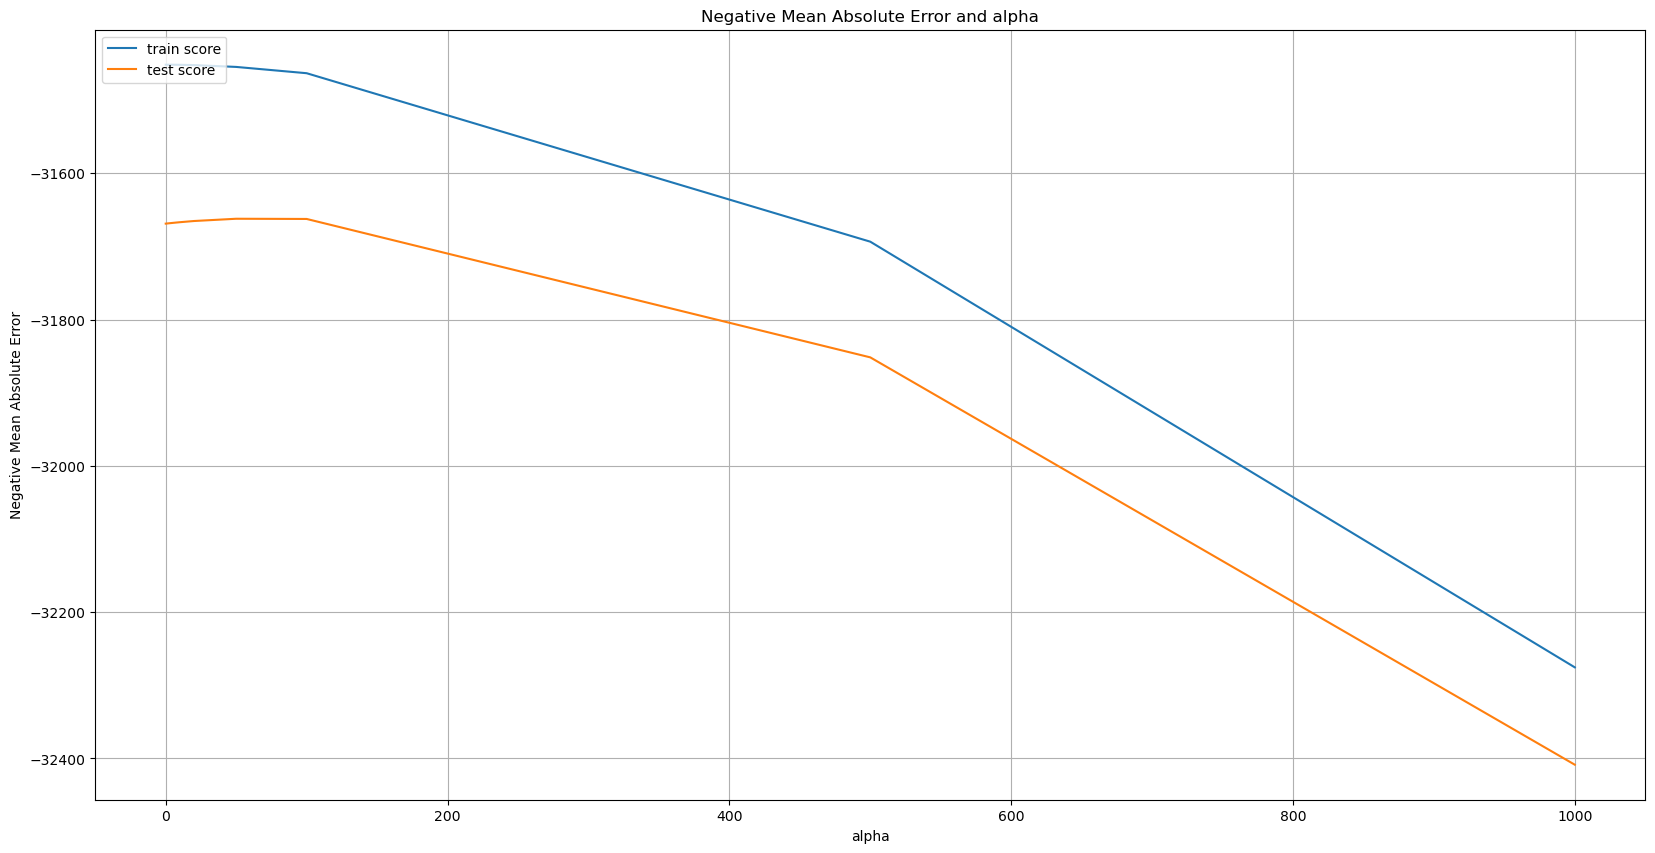

In [104]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
#plt.legend(['train score'], loc='upper left')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [107]:
best_alpha = 1
ridge = Ridge(alpha = best_alpha) #Ridge model created and initialised
ridge.fit(Xf_train, yf_train) #trained on the training data using the .fit() function

# Make predictions on the test set
ridge_pred = ridge.predict(Xf_train) #via the trained model

predicted_prices = ridge.predict(Xf_test)

# Add the predicted prices to the test dataset
X_test['price'] = predicted_prices
X_test['price'] = X_test['price'].astype(int)
X_test['price'].describe()

# Save the test dataset with predicted prices to a new CSV file
X_test[['id', 'price']].to_csv('predicted_apartment_prices_ridge_v5.csv', index=False)